# **Preprocessing**

### **Mengimport Library yang dibutuhkan**

In [421]:
# Mengimport library pandas dan memberikan alias pd. 
# Pandas digunakan untuk manipulasi dan analisis data.
import pandas as pd  
# Mengimport library joblib. 
# Joblib digunakan untuk menyimpan dan memuat model atau objek Python ke/dari disk.
import joblib  
# Mengimport library matplotlib.pyplot dan memberikan alias plt. 
# Matplotlib.pyplot digunakan untuk visualisasi data dan membuat grafik.
import matplotlib.pyplot as plt  
# Mengimport fungsi accuracy_score dan classification_report dari library sklearn.metrics. 
# accuracy_score digunakan untuk mengukur akurasi model, classification_report memberikan 
# laporan klasifikasi yang lengkap.
from sklearn.metrics import accuracy_score, classification_report  
# Mengimport fungsi train_test_split dari library sklearn.model_selection. 
# Fungsi ini digunakan untuk membagi data menjadi subset data pelatihan dan data pengujian.
from sklearn.model_selection import train_test_split  
# Mengimport kelas KNeighborsClassifier dari library sklearn.neighbors. 
# Kelas ini digunakan untuk melakukan klasifikasi dengan algoritma K-Nearest Neighbors (K-NN).
from sklearn.neighbors import KNeighborsClassifier  
# Mengimport kelas DecisionTreeClassifier dari library sklearn.tree. 
# Kelas ini digunakan untuk melakukan klasifikasi dengan menggunakan pohon keputusan.
from sklearn.tree import DecisionTreeClassifier  
# Mengimport kelas RandomForestClassifier dari library sklearn.ensemble. 
# Kelas ini digunakan untuk melakukan klasifikasi dengan menggunakan metode Random Forest.
from sklearn.ensemble import RandomForestClassifier  
# Mengimport kelas GaussianNB dari library sklearn.naive_bayes. 
# Kelas ini digunakan untuk melakukan klasifikasi dengan menggunakan Naive Bayes.
from sklearn.naive_bayes import GaussianNB  
# SelectKBest adalah metode yang digunakan untuk memilih fitur-fitur terbaik berdasarkan skor 
# yang dihitung menggunakan beberapa metrik.
# chi2 adalah metode statistik yang digunakan untuk mengukur hubungan antara 
# fitur kategorikal dan variabel target.
from sklearn.feature_selection import SelectKBest, chi2

### **Memuat data**

In [422]:

# Membaca file CSV 'train.csv' dan menyimpan datanya 
# ke dalam sebuah DataFrame yang disebut df.
df = pd.read_csv('train.csv')
# Menggunakan atribut shape pada objek DataFrame df 
# untuk mengembalikan dimensi (jumlah baris, jumlah kolom) dari DataFrame.
df.shape


(2000, 21)

Dapat dilihat bahwa dataset ini memiliki 2001 entri data dan 21 kolom atribut. Pada deskripsi dataset mobile price, dataset ini memiliki 20 attribut dan 1 class target.

In [423]:
# Menampilkan 5 baris pertama dari DataFrame df.
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### **Menangani nilai yang hilang**

In [424]:
# Menghitung jumlah nilai null pada setiap kolom dalam DataFrame df.
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Terlihat disini bahwa dataset yang digunakan tidak memiliki missing value. Jadi tidak perlu untuk ditindak lanjuti.

### **Mengubah data kategorikal menjadi numerik**

In [425]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame df.
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Semua data sudah merupakan tipe data numerik yang terdiri dari tipe data Integer dan Float. Jadi tidak memerlukan konversi tipe data

### **Melihat Value dari Target Class**
pada dataset ini, 'price_range' merupakan target class. sekarang saya akan melihat apa saja isi dari target class tersebut

In [426]:
# Menampilkan nilai unik pada kolom 'price_range' dalam DataFrame df.
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

'price_range' memiliki 4 value yaitu berupa angka 0 sampai dengan 3. Dari deskripsi pada dataset ini, berikut maksud dari 4 value class target tersebut:

- Class 0: Harga paling rendah
- Class 1: Harga sedang
- Class 2: Harga sedikit lebih mahal
- Class 3: Harga paling mahal

### **Univariate Feature Selection**

Univariate Feature Selection adalah salah satu metode seleksi fitur yang digunakan dalam analisis data. Tujuan utama dari Univariate Feature Selection adalah untuk memilih fitur-fitur yang paling relevan atau memberikan kontribusi signifikan terhadap variabel target (output) dalam sebuah dataset.

Menghitung skor atau nilai statistik univariat untuk setiap fitur dalam dataset. Skor ini mencerminkan tingkat hubungan antara fitur tersebut dengan variabel target.

In [427]:
# Baris ini mengambil kolom-kolom dari indeks ke-0 hingga ke-19 
# dari DataFrame df dan menyimpannya dalam variabel x. 
# Ini berarti x akan berisi atribut-atribut yang digunakan untuk memprediksi variabel target.
x = df.iloc[:,0:20]
# Baris ini mengambil kolom dengan indeks 20 (kolom terakhir) dari DataFrame df 
# dan menyimpannya dalam variabel y. 
# Ini berarti y akan berisi variabel target yang ingin diprediksi.
y = df.iloc[:,20:]

In [428]:
# mencetak dimensi dari x, yaitu jumlah baris dan kolom dalam x. 
# Ini berguna untuk memeriksa berapa banyak atribut yang ada dalam x.
print(x.shape)
# mencetak dimensi dari y, yaitu jumlah baris dan kolom dalam y. 
# Ini berguna untuk memeriksa berapa banyak data variabel target yang ada dalam y.
print(y.shape)

(2000, 20)
(2000, 1)


In [429]:
# Menampilkan 5 baris pertama dari variable x.
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [430]:
# Menampilkan 5 baris pertama dari variable y.
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [431]:
# Memilih 10 fitur terbaik menggunakan metode chi-square (chi2)
best_feat = SelectKBest(chi2, k=10)
# Melakukan fitting dengan atribut (x) dan variabel target (y)
fit = best_feat.fit(x, y)

In [432]:
# Membuat DataFrame dari skor chi2 hasil fitting
dfscores = pd.DataFrame(fit.scores_)
# Membuat DataFrame dari nama kolom atribut (x)
dfcolumns = pd.DataFrame(x.columns)

In [433]:
# Menggabungkan DataFrame dfcolumns dan dfscores
score_list = pd.concat([dfcolumns, dfscores], axis=1)
# Memberi nama kolom pada DataFrame score_list
score_list.columns = ["features", "scores"]

In [434]:
# Menampilkan DataFrame score_list
score_list

,features,scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


Mengurutkan fitur-fitur berdasarkan skor atau nilai statistik secara menurun. Fitur-fitur dengan skor yang lebih tinggi dianggap lebih relevan terhadap variabel target.

In [435]:
# Menampilkan 10 fitur terbaik berdasarkan skor tertinggi
print(score_list.nlargest(10, "scores"))

         features         scores
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


Menghapus fitur-fitur yang tidak terpilih dari dataset, sehingga dataset hanya terdiri dari fitur-fitur yang dipilih.

In [436]:
# Memilih 10 fitur terbaik teratas dan menghapus kolom yang tersisa
df.drop(df.columns[[1,2,3,5,7,9,10,17,18,19]],axis=1,inplace=True)

### **Membuat variabel atribut/fitur dan variabel target class**
Setelah eksplorasi data selesai, saatnya untuk memulai membuat model. Langkah pertama, saya membuat variabel khusus untuk dataframe yang berisi atribut/fitur dan target class

In [437]:
# membuang kolom 'price_range' dari dataframe
X = df.drop(['price_range'], axis=1) 
# hanya mengambil kolom 'price_range' dari dataframe
y = df['price_range']

### **Memisahkan data menjadi set pelatihan dan pengujian**

In [438]:
# Membagi data menjadi subset data pelatihan dan data pengujian dengan perbandingan 75:25.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Saya memisahkan data traning dan data testing dengan rasio 75:25

In [439]:
# Menampilkan dimensi (jumlah baris, jumlah kolom) dari subset data pelatihan 
# dan data pengujian.
X_train.shape, X_test.shape

((1500, 10), (500, 10))

## **Training Menggunakan KNN**

In [440]:
# Membuat model K-NN dengan menggunakan 5 tetangga terdekat.
model = KNeighborsClassifier(n_neighbors=5)

In [441]:
# Melatih model KNN dengan data pelatihan.
model.fit(X_train, y_train)

KNeighborsClassifier()

In [442]:
# Memprediksi target (y) dengan menggunakan model yang telah dilatih.
y_pred = model.predict(X_test)

In [443]:
# Menghitung akurasi model K-NN.
acc_knn = accuracy_score(y_pred, y_test) * 100
print('Akurasi Model K-NN: ' + str(round(acc_knn, 2)) + '%')

Akurasi Model K-NN: 92.6%


In [444]:
# Membuat laporan klasifikasi model K-NN.
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       142
           1       0.91      0.89      0.90       133
           2       0.87      0.92      0.90       118
           3       0.94      0.96      0.95       107

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



In [445]:
# Menyimpan model K-NN ke dalam file 'model_knn.pkl'.
joblib.dump(model, 'model_knn.pkl')

['model_knn.pkl']

## **Training Menggunakan Naive Bayes**

In [446]:
# Membuat model Naive Bayes.
model = GaussianNB()

In [447]:
# Melatih model dengan data training
model.fit(X_train, y_train)

GaussianNB()

In [448]:
# Memprediksi target (y) dengan menggunakan model Naive Bayes.
y_pred = model.predict(X_test)

In [449]:
# Menghitung akurasi model Naive Bayes.
acc_nb = accuracy_score(y_pred, y_test)*100
print('Akurasi Model : ' + str(round(acc_nb, 2)) + ' %.')

Akurasi Model : 82.6 %.


In [450]:
# Membuat laporan klasifikasi model Naive Bayes.
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       131
           1       0.75      0.73      0.74       135
           2       0.73      0.74      0.73       123
           3       0.93      0.91      0.92       111

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [451]:
# Menyimpan model Naive Bayes ke dalam file 'model_nb.pkl'.
joblib.dump(model, 'model_nb.pkl')

['model_nb.pkl']

## **Training Menggunakan Decision Tree**

In [452]:
# Membuat model Decision Tree.
model = DecisionTreeClassifier()

In [453]:
# Melatih model dengan data training
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [454]:
# Memprediksi target (y) dengan menggunakan model Decision Tree.
y_pred = model.predict(X_test)

In [455]:
# Menghitung akurasi model Decision Tree.
acc_dt = accuracy_score(y_pred, y_test)*100
print('Akurasi Model : ' + str(round(acc_dt, 2)) + ' %.')

Akurasi Model : 84.2 %.


In [456]:
# Membuat laporan klasifikasi model Decision Tree.
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       138
           1       0.78      0.78      0.78       130
           2       0.82      0.80      0.81       128
           3       0.88      0.92      0.90       104

    accuracy                           0.84       500
   macro avg       0.84      0.85      0.84       500
weighted avg       0.84      0.84      0.84       500



In [457]:
# Menyimpan model Decision Tree ke dalam file 'model_dt.pkl'.
joblib.dump(model, 'model_dt.pkl')

['model_dt.pkl']

## **Training Menggunakan Random Forest**

In [458]:
# Membuat model Random Forest dengan 100 pohon dan random state=1.
model = RandomForestClassifier(n_estimators=100, random_state=1)

In [459]:
# Melatih model dengan data training
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [460]:
# Memprediksi target (y) dengan menggunakan model Random Forest.
y_pred = model.predict(X_test)

In [461]:
# Menghitung akurasi model Random Forest.
acc_rf = accuracy_score(y_pred, y_test)*100
print('Akurasi Model : ' + str(round(acc_rf, 2)) + ' %.')

Akurasi Model : 91.0 %.


In [462]:
# Membuat laporan klasifikasi model Random Forest.
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       142
           1       0.85      0.87      0.86       128
           2       0.87      0.89      0.88       122
           3       0.95      0.96      0.96       108

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [463]:
# Menyimpan model Random Forest ke dalam file 'model_rf.pkl'.
joblib.dump(model, 'model_rf.pkl')

['model_rf.pkl']

## **Perbandingan Akurasi Model**

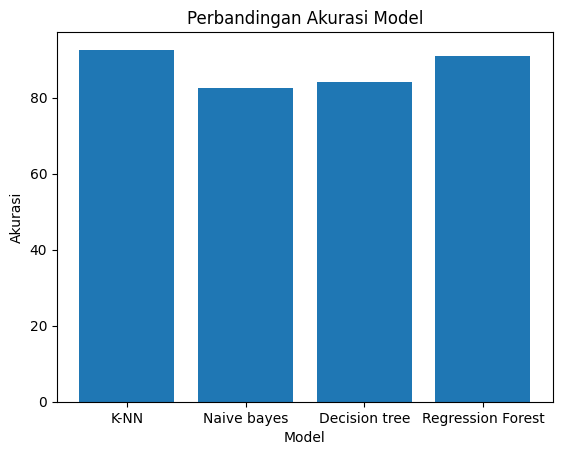

In [464]:
# Menampilkan perbandingan akurasi dari empat model.
# Menyimpan nama-nama model dalam sebuah list.
model = ['K-NN', 'Naive bayes', 'Decision tree', 'Regression Forest']
# Menyimpan nilai akurasi dari masing-masing model dalam sebuah list.
akurasi = [acc_knn, acc_nb, acc_dt, acc_rf]
# Membuat grafik batang untuk membandingkan akurasi model.
plt.bar(model, akurasi)
# Menyertakan label untuk sumbu x (Model).
plt.xlabel('Model')
# Menyertakan label untuk sumbu y (Akurasi).
plt.ylabel('Akurasi')
# Menyertakan judul untuk grafik.
plt.title('Perbandingan Akurasi Model')
# Menampilkan grafik batang.
plt.show()
